In [1]:
import pandas as pd

from code.parser.parse import Parser
from code.gru.gru import GRUModel
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from code.wiener_kolmogorov.wiener_kolmogorov import WienerKolmogorov as WK
from code.detector.detector import  Detector
import numpy as np
from tensorflow import keras
from keras.utils.vis_utils import plot_model

pre1 = Parser.read('../../runs/1/pre.txt')
abs1 = Parser.read('../../runs/1/abs.txt')
pre2 = Parser.read('../../runs/2/pre.txt')
abs2 = Parser.read('../../runs/2/abs.txt')

In [2]:
pre1 = pd.concat([pre1, abs1], ignore_index=True)
abs1 = pd.concat([abs1, abs1], ignore_index=True)
pre2 = pd.concat([pre2, abs2], ignore_index=True)
abs2 = pd.concat([abs2, abs2], ignore_index=True)

In [3]:
y = np.concatenate((np.ones(50), np.zeros(150)))

In [3]:
nn = GRUModel(inputDim=1, hiddenNum=128, outputDim=1, lr=0.01)
# nn.train(pre1.rssi, y, 10, 10)

/home/paavo/.local/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


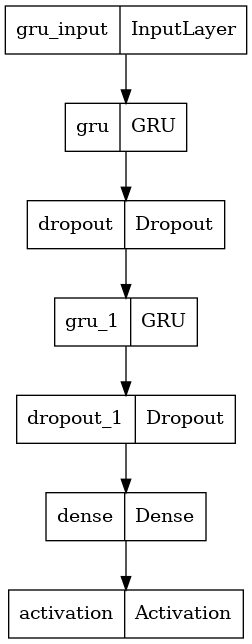

In [6]:
plot_model(
    nn.model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [5]:
nn.train(pre1.rssi, y, 250, 2)

Epoch 1/250
100/100 [==============================] - 3s 4ms/step - loss: 0.3702
Epoch 2/250
100/100 [==============================] - 0s 4ms/step - loss: 0.1504
Epoch 3/250
100/100 [==============================] - 0s 4ms/step - loss: 0.0707
Epoch 4/250
100/100 [==============================] - 0s 4ms/step - loss: 0.0680
Epoch 5/250
100/100 [==============================] - 0s 4ms/step - loss: 0.0553
Epoch 6/250
100/100 [==============================] - 0s 4ms/step - loss: 0.0529
Epoch 7/250
100/100 [==============================] - 0s 4ms/step - loss: 0.0427
Epoch 8/250
100/100 [==============================] - 0s 4ms/step - loss: 0.0530
Epoch 9/250
100/100 [==============================] - 0s 4ms/step - loss: 0.0404
Epoch 10/250
100/100 [==============================] - 0s 4ms/step - loss: 0.0382
Epoch 11/250
100/100 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 12/250
 11/100 [==>...........................] - ETA: 0s - loss: 0.0640

KeyboardInterrupt: 

In [7]:
def clean(preds):
    res= []
    for pred in preds:
        d0 = abs(pred - 0)
        d1 = abs(pred - 1)
        if d0 < d1:
            res.append(0)
        else:
            res.append(1)
    return res

In [16]:
from scipy.signal import medfilt
cleaned = medfilt(clean(nn.predict(pre1.rssi)), )

In [17]:
accuracy_score(y, cleaned)

1.0

In [18]:
pre = Parser.read('../../runs/1/pre.txt')

In [20]:
cleaned = medfilt(clean(nn.predict(pre.rssi)), 29)

ValueError: Found input variables with inconsistent numbers of samples: [200, 100]

In [22]:
nn.predict(abs1.rssi)

array([[0.00256675],
       [0.00256675],
       [0.00273333],
       [0.00256675],
       [0.0021797 ],
       [0.00273333],
       [0.0021797 ],
       [0.00279606],
       [0.0014478 ],
       [0.00256675],
       [0.00256675],
       [0.00256675],
       [0.00273333],
       [0.0014478 ],
       [0.00273333],
       [0.00279606],
       [0.0014478 ],
       [0.00157936],
       [0.00279606],
       [0.00273333],
       [0.0021797 ],
       [0.0021797 ],
       [0.00256675],
       [0.0021797 ],
       [0.00279606],
       [0.0021797 ],
       [0.0014478 ],
       [0.0014478 ],
       [0.00256675],
       [0.0021797 ],
       [0.02550466],
       [0.00256675],
       [0.00157936],
       [0.00256675],
       [0.00256675],
       [0.0014478 ],
       [0.02550502],
       [0.00273333],
       [0.00256675],
       [0.0028167 ],
       [0.00273333],
       [0.00279606],
       [0.00256675],
       [0.00256675],
       [0.00273333],
       [0.0021797 ],
       [0.0014478 ],
       [0.002

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# forest = AdaBoostClassifier()
# forest.fit(pre1.rssi.to_numpy()[:,np.newaxis], pre1.y)
# predict = forest.predict(pre2.rssi.to_numpy()[:,np.newaxis])
# accuracy_score(pre2.y.to_numpy(), medfilt(predict, kernel_size=13))